<a href="https://colab.research.google.com/github/HAdeelAli11/masar/blob/main/Employee_Attrition_%26_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I


* IBM HR Analytics Employee Attrition & Performance




```
Dataset called IBM HR Analytics Employee Attrition
Brief description: This is a fictional data set created by IBM data scientists.

The source: ( https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset ).


DataSet Description
*   Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

*  EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

* JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

* JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

* PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

* RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

* WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

```

## 1- Data Cleaning

In [ ]:
#Import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from logging import LogRecord
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [ ]:
url = '/content/WA_Fn-UseC_-HR-Employee-Attrition (1).csv'

#Read data from CSV file
data = pd.read_csv(url)
data


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
#Explore the data
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [ ]:
#The column
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No missings




In [ ]:
data.duplicated().sum()


0

No duplicates

In [ ]:
#Check for outliers (Five point summury)

# five point summury
five_num_summary = data.describe().transpose()
print('five number summary')
print(five_num_summary)

five number summary
                           count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome       

there no outliers


In [ ]:
# Check for inconsistencies
print(data.value_counts())

Age  Attrition  BusinessTravel  DailyRate  Department              DistanceFromHome  Education  EducationField    EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  JobRole                JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
18   No         Non-Travel      287        Research & Development  5                 2          Life Sciences     1              1012            2                        Male    73          3               1         Research Scientist     4                Single         1051           13493        1                   Y       No        15                 3                  4                         80             0        

## 2- Data Visualization

### Correlation Matrix

<ipython-input-25-209ab3b597fc>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr().abs()


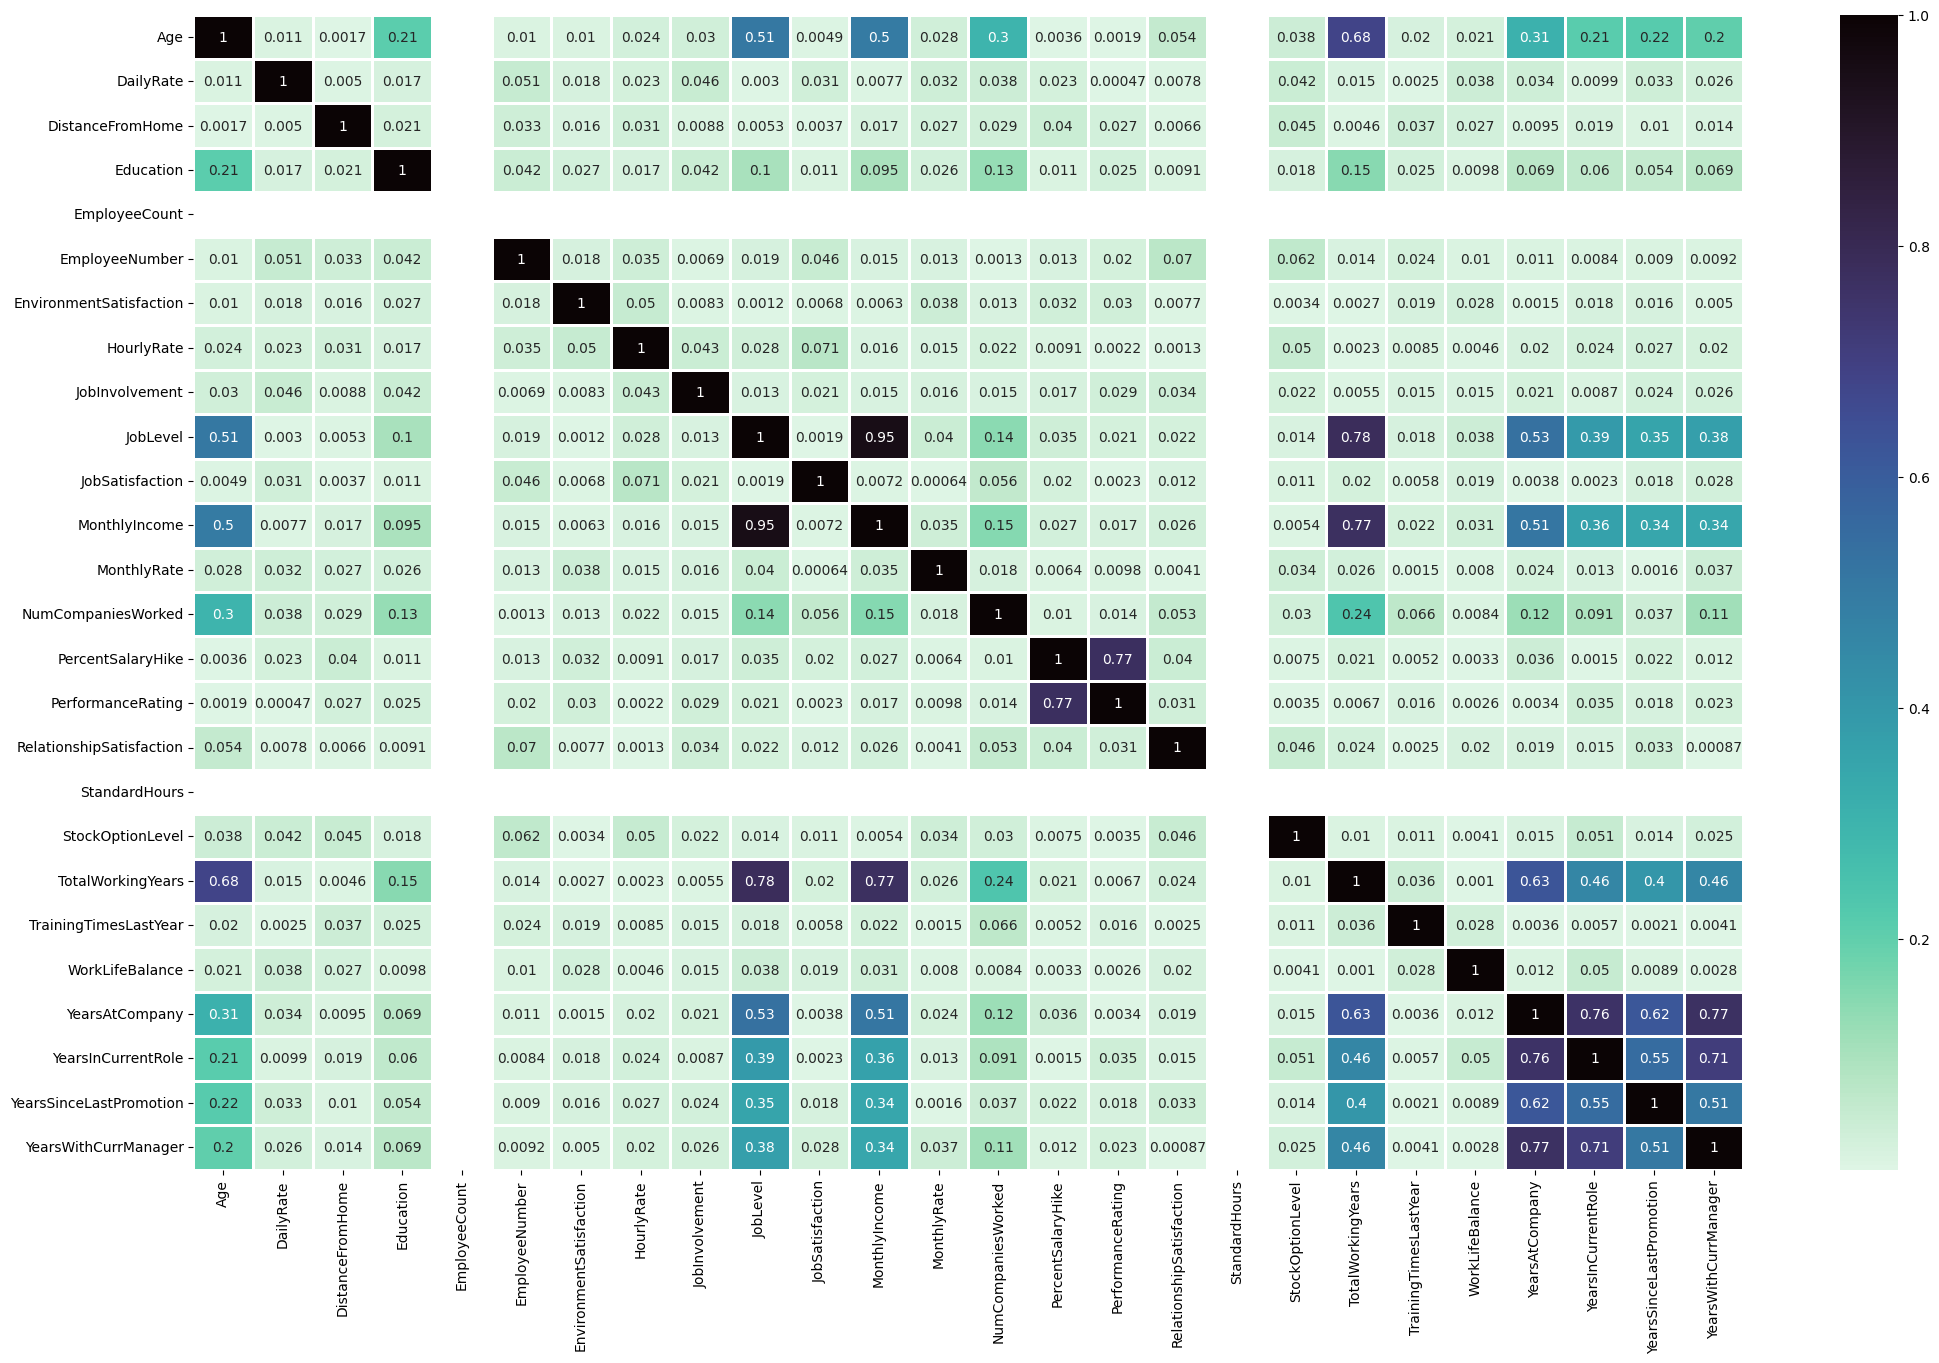

In [ ]:
# -1 to +1
# Heatmap using Seaborn

corr=data.corr().abs()
plt.figure(figsize = (25,15))

ax = sns.heatmap(corr, annot=True, linewidths=1,cmap='mako_r')

### Boxplot

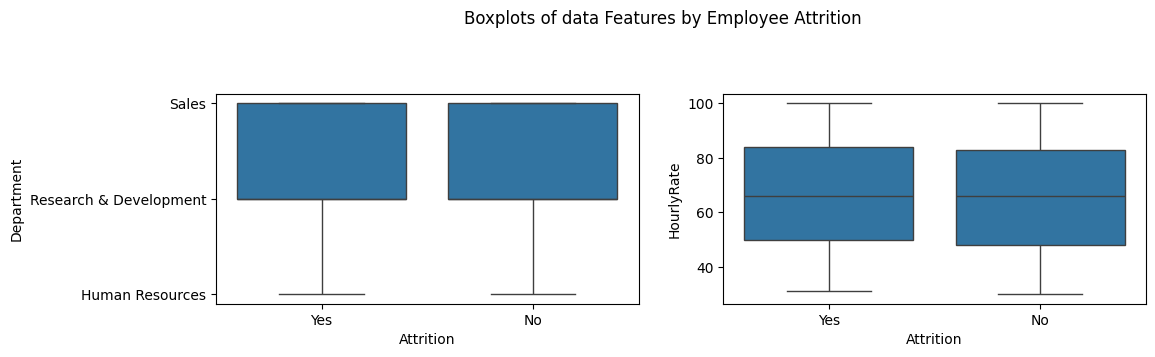

In [ ]:
#Set the matplotlib

#Create boxplots for each column using seaborn

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x="Attrition", y="Department", data=data)
plt.subplot(2, 2, 2)
sns.boxplot(x="Attrition", y="HourlyRate", data=data)
plt.suptitle("Boxplots of data Features by Employee Attrition ", y=1.02)
plt.show()


### Pie chart

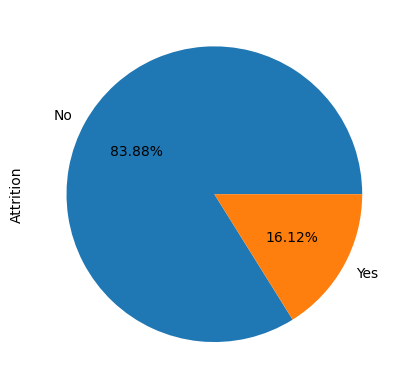

In [ ]:
# Create a Pie chart
counts = data['Attrition'].value_counts()
counts.plot.pie(autopct='%.2f%%')
plt.show()

### Histogram

<Axes: xlabel='Age', ylabel='count'>

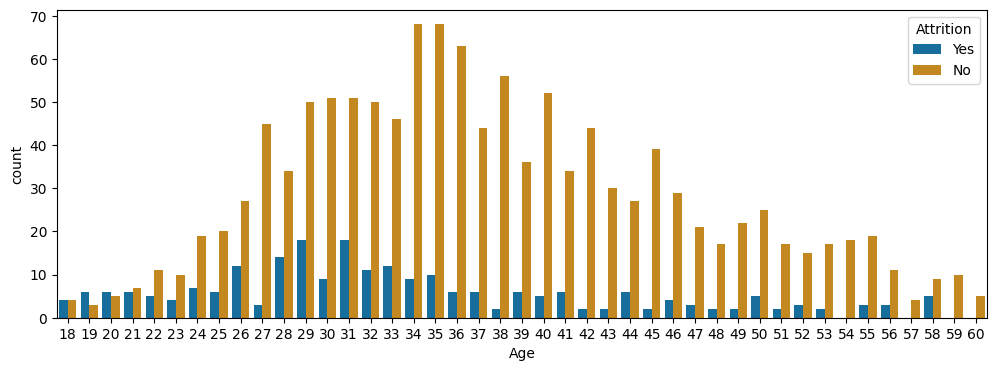

In [ ]:
# Create a histogram Age with Attration
plt.figure(figsize=(12,4))
sns.countplot(x='Age', hue='Attrition' , data=data , palette = 'colorblind')

we note that people whose ages range from 34 to 36 are employees work in the company
people between the ages of 29 and 31 have left work in the company

<Axes: xlabel='Gender', ylabel='count'>

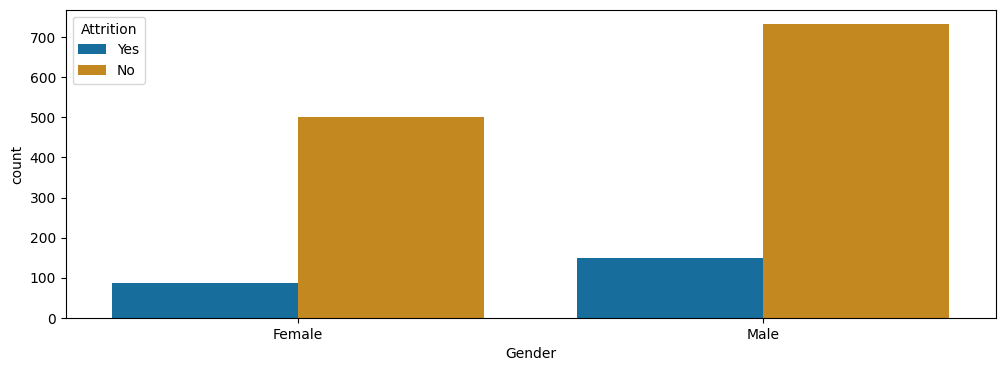

In [ ]:
# Create a histogram Gender with Attration
plt.figure(figsize=(12,4))
sns.countplot(x='Gender', hue='Attrition' , data=data , palette = 'colorblind')

## 3- ML Model

### **Problem Statement:** Given above data build a machine learning model that can predict the probability of an employee to resign

> Indented block



In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df=data.copy()

# Data Processing

In [ ]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)

df['Attrition'] = df.Attrition.astype("category").cat.codes

In [ ]:
categorical_col.remove('Attrition')


In [ ]:
# Transform categorical data into dummies
# categorical_col.remove("Attrition")
# data = pd.get_dummies(df, columns=categorical_col)
# data.info()

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])


In [ ]:
results = {}


## Spliting Data

In [ ]:

X = df.drop('Attrition', axis=1)
y = df.Attrition #target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Randoom Forest





In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [ ]:
# prediction model
y_pred = rf.predict(X_test)

In [ ]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8707482993197279


# Logsitc Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Logreg = rf.predict(X_test)

In [ ]:
# prompt: create a logstic regression

y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8639455782312925


# KNeighborsClassifier




In [ ]:

# Evaluate the
Knnclas=KNeighborsClassifier(n_neighbors=5)
Knnclas.fit(X_train, y_train)
knnpred=Knnclas.predict(X_test)

In [ ]:

Knnacu = metrics.accuracy_score(y_test, knnpred)

print("Accuracy:", Knnacu)


Accuracy: 0.8390022675736961


# SVM

In [ ]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)
classifier_pred = classifier.predict(X_test)

In [ ]:
# Prediction model
y_pred = classifier.predict(X_test)

In [ ]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy', accuracy)

Accuracy 0.8526077097505669


**Best model was Random forest with Accuracy of : 0.870**

# Part II

## solve Q1

1. Loop:
Question:
Write a Python program that uses a 'for' loop to print all even numbers from 1 to 10. Then, use 'while' loop.

In [ ]:
# create function even_num that take 2 parameter from user
# parameter#1 => first number parameter#2 => last number (Range of number)
def even_num(first, last):
    print("Even numbers between",first, "and",last, "are:")
    for num in range(first, last + 1):
        if num % 2 == 0:
            print(num)
even_num(1, 10)

# Using while loop to print even numbers from 1 to 10
def even_num_while(first, last) :
    print("Using while loop:")
    while first<= last:
      if first % 2 == 0:
         print(first)
      first += 1
even_num_while(1, 10)




Even numbers between 1 and 10 are:
2
4
6
8
10
Using while loop:
2
4
6
8
10


## solve Q2 :

2. Control Flows:
Question:
Create a Python function named grade_classifier that takes a student's score as an argument and returns a string indicating their grade. Use the following criteria:

Score >= 90: "A"
80 <= Score < 90: "B"
70 <= Score < 80: "C"
60 <= Score < 70: "D"
Score < 60: "F"

In [ ]:
# Create function grade_classifier

def grade_classifier(score):
    if score >= 90 :
        return "A"
    elif score >= 80 and score < 90 :  #the interval did not inculde 90
        return "B"
    elif score >= 70  and score < 80: #same here
        return "C"
    elif score >= 60 and score < 70:
        return "D"
    else:
        return "F"

# Example usage:
score = 85
print(f"The student's grade is: {grade_classifier(score)}")






The student's grade is: B


## solve Q3

3. If Conditions:
Question:
Write a Python program that prompts the user to enter their age. Use if-elif-else statements to categorize and print the user's age group as follows:

If the age is less than 13, print "Child."
If the age is between 13 and 19 (inclusive), print "Teenager."
If the age is between 20 and 59 (inclusive), print "Adult."
If the age is 60 or older, print "Senior Citizen."

In [ ]:


# Prompt the user to enter their age

Age = int(input('Please enter your age:'))
if Age <=13:
  print ('This person is a child')
elif Age >= 13 and Age <= 19:
  print ('this person is a teenager')
elif Age >= 20 and Age <= 59:
  print ('This person is Adult')
else:
 if Age >= 60:
  print ('This person is Senior Citizen')


## solve Q4  

4. Functions:
Question:
Define a Python function named multiply_numbers that takes two parameters (num1 and num2) and returns their product. Test the function with values 5 and 7.
5 * 7 = 35

In [ ]:
# Create function multiply_numbers


# Test the function with values 5 and 7
def multiply_numbers(num1, num2):
  product = num1 * num2
  return product

result = multiply_numbers(5, 7)
print(result)

## solve Q5

5. Combine All the Above:
Question:
Write a Python program that does the following:

Prompts the user to enter a number (user_num).
Uses a loop to print all numbers from 1 to user_num (inclusive) that are divisible by 3.
Calls the grade_classifier function to classify a user's score (you can use a predefined score for testing).
Prints a message indicating whether the classified grade is satisfactory or not.

In [ ]:
# Prompt the user to enter their age
user_num = int(input("Enter a number: "))

# Use a loop to print numbers divisible by 3 from 1 to user_num
print(f"Numbers divisible by 3 from 1 to {user_num}:")
for num in range(1, user_num + 1):
    if num % 3 == 0:
        print(num)

# Call the grade_classifier function with a predefined score for testing
test_score = 60
classified_grade = grade_classifier(test_score)

# Print a message indicating whether the classified grade is satisfactory or not
if classified_grade in ['A', 'B', 'C']:
    print(f"The classified grade ({classified_grade}) is satisfactory.")
else:
    print(f"The classified grade ({classified_grade}) is not satisfactory.")